# VGG16 pretrained model to classify Institut Teknologi Bandung's buildings.

## Import prerequisites

In [1]:
from PIL import Image
from matplotlib import image
from numpy import asarray
import matplotlib.pyplot as plt
import PIL
from os import listdir
from tqdm.notebook import tqdm
import numpy as np
from random import shuffle
import cv2

In [12]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import optimizers
import tensorflow_addons as tfa
from tensorflow import argmax
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import concat

## Define datasets directory

In [3]:
img_size = 100
train_dir = r'D:/Nikko/COLLEGE THINGS/Institut Teknologi Bandung (2019 - 2021)/Lectures/Semester 1/Komputasi Cerdas & Machine Learning/Tugas Besar/iCloud Photos/data_train/'
val_dir = r'D:/Nikko/COLLEGE THINGS/Institut Teknologi Bandung (2019 - 2021)/Lectures/Semester 1/Komputasi Cerdas & Machine Learning/Tugas Besar/iCloud Photos/data_val/'
test_dir = r'D:/Nikko/COLLEGE THINGS/Institut Teknologi Bandung (2019 - 2021)/Lectures/Semester 1/Komputasi Cerdas & Machine Learning/Tugas Besar/iCloud Photos/data_test/'

## Define functions to load and process datasets

In [4]:
def label_img(img):
    word_label = img.split('-')[0]
    if word_label == 'Aula_Barat': return [1,0,0,0,0,0]
    elif word_label == 'Aula_Timur': return [0,1,0,0,0,0]
    elif word_label == 'CC_Barat': return [0,0,1,0,0,0]
    elif word_label == 'CC_Timur': return [0,0,0,1,0,0]
    elif word_label == 'Labtek_V': return [0,0,0,0,1,0]
    elif word_label == 'Labtek_VI': return [0,0,0,0,0,1]

def create_train_data():
    training_data = list()
    for img in tqdm(listdir(train_dir)):
        labels = label_img(img)
        image_data = Image.open(train_dir+img)
        image_data = image_data.resize((img_size,img_size))
        training_data.append([np.array(image_data)/255., np.array(labels)])
    shuffle(training_data)
    return training_data

def create_val_data():
    val_data = list()
    for img in tqdm(listdir(val_dir)):
        labels = label_img(img)
        image_data = Image.open(val_dir+img)
        image_data = image_data.resize((img_size,img_size))
        val_data.append([np.array(image_data)/255., np.array(labels)])
    shuffle(val_data)
    return val_data

def create_test_data():
    testing_data = list()
    for img in tqdm(listdir(test_dir)):
        labels = label_img(img)
        image_data = Image.open(test_dir+img)
        image_data = image_data.resize((img_size,img_size))
        testing_data.append([np.array(image_data)/255., np.array(labels)])
    shuffle(testing_data)
    return testing_data

In [5]:
print('Creating Training Data...')
training_data = create_train_data()
print('Creating Val Data...')
val_data = create_val_data()
print('Creating Testing Data...')
testing_data = create_test_data()

Creating Training Data...


  0%|          | 0/420 [00:00<?, ?it/s]

Creating Val Data...


  0%|          | 0/108 [00:00<?, ?it/s]

Creating Testing Data...


  0%|          | 0/58 [00:00<?, ?it/s]

In [6]:
x_train = np.array([i[0] for i in training_data]).reshape(-1, img_size, img_size, 3)
y_train = np.array([i[1] for i in training_data])

x_val = np.array([i[0] for i in val_data]).reshape(-1, img_size, img_size, 3)
y_val = np.array([i[1] for i in val_data])

x_test = np.array([i[0] for i in testing_data]).reshape(-1, img_size, img_size, 3)
y_test = np.array([i[1] for i in testing_data])

## Import pretrained vgg16 and fine tuning

In [7]:
vgg_conv = vgg16.VGG16(weights='imagenet',
                      include_top=False,
                      input_shape=(img_size,img_size,3))

The model imported here is only the Convolutional parts to extract features. We define a new Dense/Neural Network part for our specific case.

In [8]:
model = Sequential()

model.add(vgg_conv)

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              4719616   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 6150      
Total params: 19,440,454
Trainable params: 19,440,454
Non-trainable params: 0
_________________________________________________________________


In [9]:
cb = tfa.callbacks.TQDMProgressBar()

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['accuracy'])

hist = model.fit(x_train, y_train,
                epochs=20,
                validation_data=(x_test,y_test),
                batch_size=32,                 
                verbose=0,
                callbacks=[cb])

Training:   0%|                                                                                0/20 ETA: ?s,  …

Epoch 1/20


0/14                                                                                                         E…

Epoch 2/20


0/14                                                                                                         E…

Epoch 3/20


0/14                                                                                                         E…

Epoch 4/20


0/14                                                                                                         E…

Epoch 5/20


0/14                                                                                                         E…

Epoch 6/20


0/14                                                                                                         E…

Epoch 7/20


0/14                                                                                                         E…

Epoch 8/20


0/14                                                                                                         E…

Epoch 9/20


0/14                                                                                                         E…

Epoch 10/20


0/14                                                                                                         E…

Epoch 11/20


0/14                                                                                                         E…

Epoch 12/20


0/14                                                                                                         E…

Epoch 13/20


0/14                                                                                                         E…

Epoch 14/20


0/14                                                                                                         E…

Epoch 15/20


0/14                                                                                                         E…

Epoch 16/20


0/14                                                                                                         E…

Epoch 17/20


0/14                                                                                                         E…

Epoch 18/20


0/14                                                                                                         E…

Epoch 19/20


0/14                                                                                                         E…

Epoch 20/20


0/14                                                                                                         E…

In [10]:
model.save('itbbuildingclassification.h5')

## Visualize accuracy and loss during training

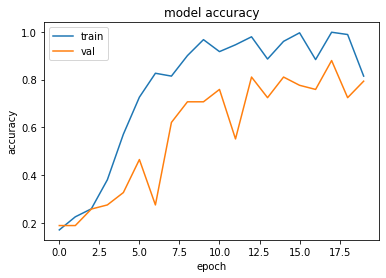

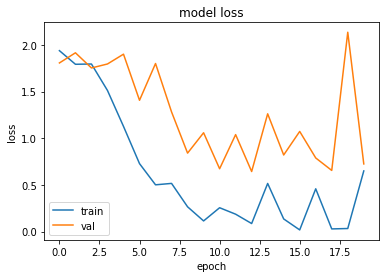

In [11]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

## Reports

In [13]:
y_pred = model.predict(x_val)
y_pred = argmax(y_pred, axis=1)
y_true = concat([argmax(y) for x, y in val_data], axis=0)

print(classification_report(y_pred, y_true))
print(confusion_matrix(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.94      0.65      0.77        26
           2       0.89      0.94      0.91        17
           3       0.83      0.94      0.88        16
           4       0.89      0.89      0.89        18
           5       0.83      1.00      0.91        15

    accuracy                           0.86       108
   macro avg       0.86      0.88      0.87       108
weighted avg       0.87      0.86      0.86       108

[[14  1  1  0  0  0]
 [ 4 17  0  2  2  1]
 [ 0  0 16  1  0  0]
 [ 0  0  1 15  0  0]
 [ 0  0  0  0 16  2]
 [ 0  0  0  0  0 15]]
